<a href="https://colab.research.google.com/github/sur4ds/stats_ml_jun2020/blob/master/Linear_regression_Fuelconsumption_CO2asTarget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df["MODELYEAR"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
1062    2014
1063    2014
1064    2014
1065    2014
1066    2014
Name: MODELYEAR, Length: 1067, dtype: int64>

In [ ]:
# Since there is no variation in the Modelyear ,i.e., allthe values are of same value we will drop this column


In [6]:
# find the unique vales in the make column
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [11]:
import seaborn as sns


In [10]:
?sns.scatterplot

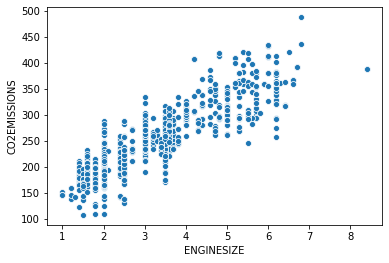

In [12]:
sns.scatterplot(df["ENGINESIZE"],df["CO2EMISSIONS"])


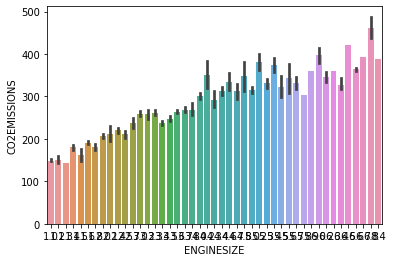

In [13]:

sns.barplot(df["ENGINESIZE"],df["CO2EMISSIONS"])

<BarContainer object of 1067 artists>

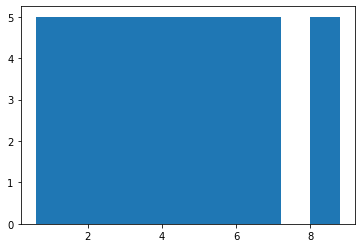

In [ ]:
# plt.bar(df["ENGINESIZE"],data=df["FUELCONSUMPTION_COMB_MPG"],height= 5,width =0.8)

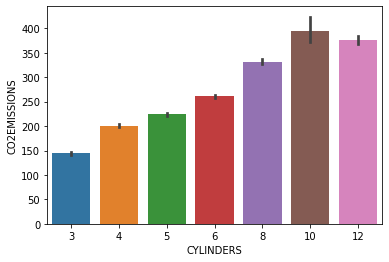

In [15]:
sns.barplot(df["CYLINDERS"],df["CO2EMISSIONS"])

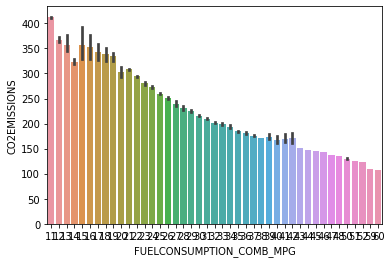

In [16]:
sns.barplot(df["FUELCONSUMPTION_COMB_MPG"],df["CO2EMISSIONS"])

In [17]:
x_columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']

y_columns = ['CO2EMISSIONS']

X = df[x_columns]
y = df[y_columns]

In [18]:
X.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG
0,2.0,4,33
1,2.4,4,29
2,1.5,4,48
3,3.5,6,25
4,3.5,6,27


In [19]:
y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG
309,3.6,6,25
319,2.4,4,31
261,5.3,8,20
306,5.7,8,21
737,5.5,8,22


In [23]:
y_train.head()

,CO2EMISSIONS
309,258
319,212
261,317
306,308
737,301


In [24]:
X_test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG
732,4.7,8,21
657,3.5,6,29
168,3.6,6,22
86,3.0,6,29
411,2.0,4,31


In [25]:
y_test.head()

,CO2EMISSIONS
732,304
657,221
168,294
86,221
411,207


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Fit the Liner regression algo for the training data 
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# The R2 value of the Model
linreg.score(X_test,y_test)

0.8902704501188249

In [29]:
# Predicted value from the model
y_pred = linreg.predict(X_test)

In [31]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)

In [32]:
# To fond the RMSE value.
np.sqrt(mse)

21.334368857859715